In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(style='white')
%matplotlib inline

In [47]:
data = pd.read_csv('People_killed_by_guns_in_USA.csv')
data.head()

,Date Killed,City,State,Victim Name,Victim Age,Victim Age Group,Victim Gender,Source,Latitude,Longitude,...,Handgun - Owner license required,Handgun - Carry permits issued,Handgun - Open Carry,Handgun - State Preemption of local restrictions,Handgun - NFA weapons restricted,Handgun - Peaceable Journey laws,Date Killed.year,Date Killed.month,Date Killed.day-of-month,Date Killed.day-of-week
0,2012-12-14,Westminster,Colorado,Antida Archuleta,20.0,adult,Female,http://www.9news.com/rss/story.aspx?storyid=30...,39.893668,-105.072112,...,No,Yes,Yes,Yes,No,Yes,2012,12,14,5
1,2012-12-14,Newtown,Connecticut,Charlotte Bacon,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
2,2012-12-14,Newtown,Connecticut,Olivia Engel,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
3,2012-12-14,Newtown,Connecticut,Ana Marquez-Greene,6.0,child,Female,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5
4,2012-12-14,Newtown,Connecticut,Dylan Hockley,6.0,child,Male,http://www.cnn.com/2012/12/15/us/connecticut-s...,41.412323,-73.311424,...,No,Yes,Yes,Partial,Partial,No,2012,12,14,5


In [48]:
data.shape

(8306, 34)

In [49]:
data.columns

Index(['Date Killed', 'City', 'State', 'Victim Name', 'Victim Age',
       'Victim Age Group', 'Victim Gender', 'Source', 'Latitude', 'Longitude',
       'State Population', 'BG Checks per 100k',
       'Long Gun - State Permit to Purchase',
       'Long Gun - Firearm registration', 'Long Gun - Assault weapon law',
       'Long Gun - Owner license required', 'Long Gun - Carry permits issued',
       'Long Gun - Open Carry',
       'Long Gun - State Preemption of local restrictions',
       'Long Gun - NFA weapons restricted',
       'Long Gun - Peaceable Journey laws',
       'Handgun - State Permit to Purchase', 'Handgun - Firearm registration',
       'Handgun - Assault weapon law', 'Handgun - Owner license required',
       'Handgun - Carry permits issued', 'Handgun - Open Carry',
       'Handgun - State Preemption of local restrictions',
       'Handgun - NFA weapons restricted', 'Handgun - Peaceable Journey laws',
       'Date Killed.year', 'Date Killed.month', 'Date Killed.day-of

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306 entries, 0 to 8305
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Date Killed                                        8306 non-null   object 
 1   City                                               8306 non-null   object 
 2   State                                              8306 non-null   object 
 3   Victim Name                                        7417 non-null   object 
 4   Victim Age                                         7692 non-null   float64
 5   Victim Age Group                                   8132 non-null   object 
 6   Victim Gender                                      8267 non-null   object 
 7   Source                                             8306 non-null   object 
 8   Latitude                                           8306 non-null   float64
 9   Longitud

# Проверка гипотезы: Убийства чаще совершаются из нелицензированного оружия

In [52]:
# Подготовка данных
license_columns = [col for col in data.columns if 'license required' in col]
data['Licensed Gun'] = data.apply(lambda row: 'Licensed' if 'Yes' in row[license_columns].values else 'Unlicensed', axis=1)

C:\Users\extre\AppData\Local\Temp\ipykernel_18540\3882470611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=license_counts.index, y=license_counts.values, palette='viridis')


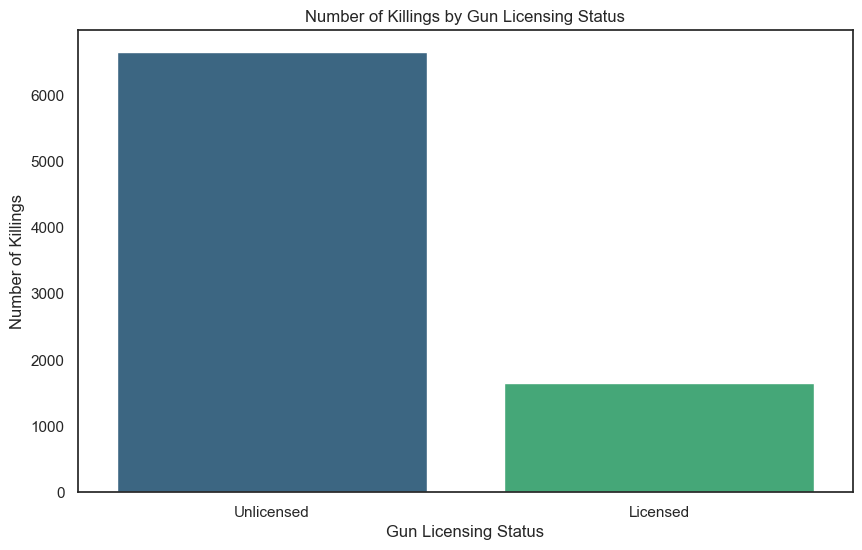

In [53]:
# Визуализация
license_counts = data['Licensed Gun'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=license_counts.index, y=license_counts.values, palette='viridis')
plt.title('Number of Killings by Gun Licensing Status')
plt.ylabel('Number of Killings')
plt.xlabel('Gun Licensing Status')
plt.show()

In [54]:
# Статистический анализ
data['Licensed Gun'].value_counts()

Licensed Gun
Unlicensed    6650
Licensed      1656
Name: count, dtype: int64

На графике видно, что убийства чаще совершаются с использованием нелицензированного оружия по сравнению с лицензированным.

# Влияние законов о регистрации оружия на количество убийств

In [55]:
# Создание таблицы сопряженности для регистрации оружия и убийств
registration_columns = [col for col in data.columns if 'registration' in col]
data['Registered Gun'] = data.apply(lambda row: 'Registered' if 'Yes' in row[registration_columns].values else 'Unregistered', axis=1)

contingency_table_registration = pd.crosstab(data['Registered Gun'], data['Handgun - Firearm registration'])
contingency_table_registration

Handgun - Firearm registration,No,Partial,Yes
Registered Gun,,,
Registered,0,0,1213
Unregistered,4663,121,0


C:\Users\extre\AppData\Local\Temp\ipykernel_18540\1122751957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=registered_counts.index, y=registered_counts.values, palette='viridis')


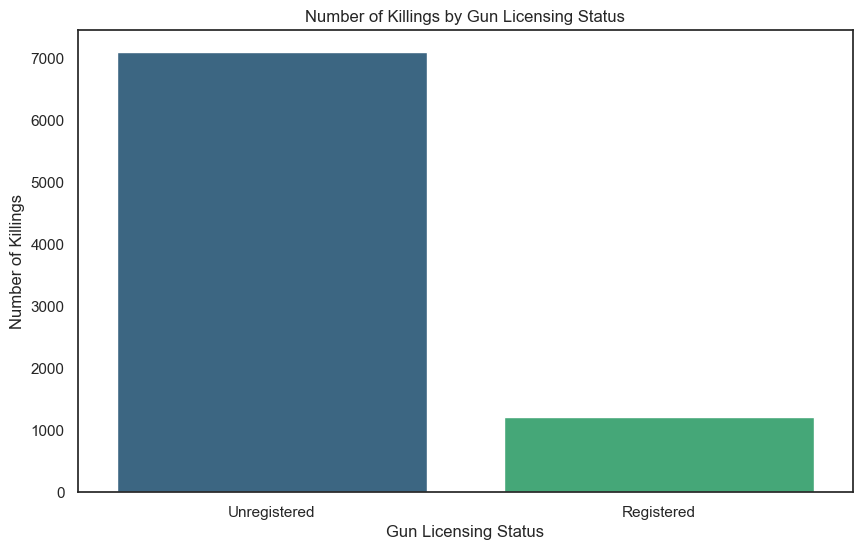

In [56]:
registered_counts = data['Registered Gun'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=registered_counts.index, y=registered_counts.values, palette='viridis')
plt.title('Number of Killings by Gun Licensing Status')
plt.ylabel('Number of Killings')
plt.xlabel('Gun Licensing Status')
plt.show()

# Анализ сезонности убийств

Мы можем проверить, есть ли тенденция к увеличению количества убийств в определенные месяцы.

C:\Users\extre\AppData\Local\Temp\ipykernel_18540\3713731422.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_killings.index, y=monthly_killings.values, palette='coolwarm')


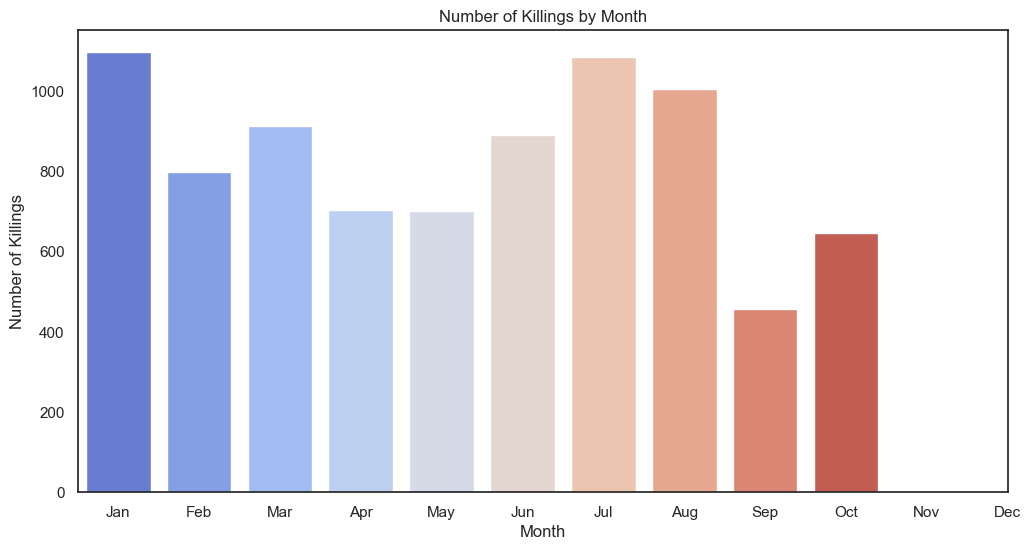

In [57]:
# Подготовка данных
data['Date Killed'] = pd.to_datetime(data['Date Killed'])
data['Month'] = data['Date Killed'].dt.month

# Подсчет убийств по месяцам
monthly_killings = data['Month'].value_counts().sort_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_killings.index, y=monthly_killings.values, palette='coolwarm')
plt.title('Number of Killings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Killings')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Зависимость количества убийств от пола жертвы

C:\Users\extre\AppData\Local\Temp\ipykernel_18540\2664506405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_killings.index, y=gender_killings.values, palette='pastel')


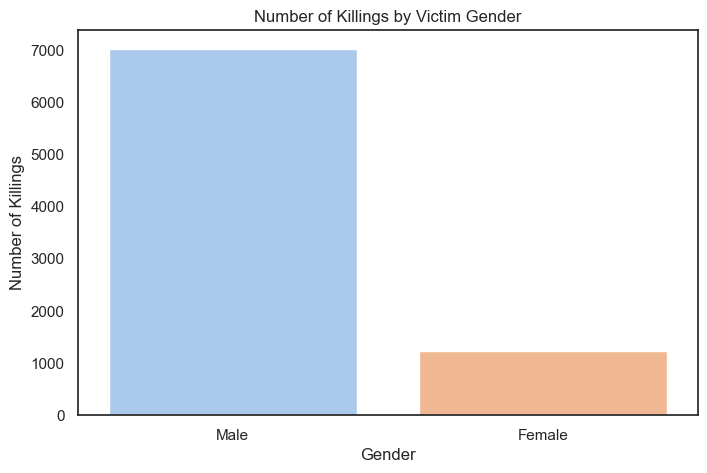

In [58]:
# Подготовка данных
gender_killings = data['Victim Gender'].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_killings.index, y=gender_killings.values, palette='pastel')
plt.title('Number of Killings by Victim Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Killings')
plt.show()

In [59]:
gender_killings


Victim Gender
Male      7032
Female    1235
Name: count, dtype: int64

Результаты показывают, что убийства среди мужчин происходят значительно чаще, чем среди женщин (7032 против 1235).

# Возрастные группы жертв и использование оружия

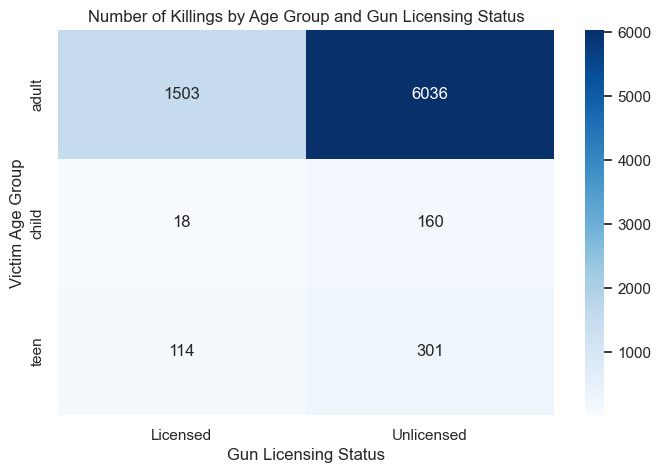

In [60]:
# Подготовка данных
age_license = pd.crosstab(data['Victim Age Group'], data['Licensed Gun'])

# Визуализация
plt.figure(figsize=(8, 5))
sns.heatmap(age_license, annot=True, fmt="d", cmap='Blues')
plt.title('Number of Killings by Age Group and Gun Licensing Status')
plt.xlabel('Gun Licensing Status')
plt.ylabel('Victim Age Group')
plt.show()

Распределение показывает, что большинство убийств в возрастной группе взрослых происходит с использованием нелицензированного оружия.

# Влияние наличия разрешения на ношение оружия на количество убийств

C:\Users\extre\AppData\Local\Temp\ipykernel_18540\2158350186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')


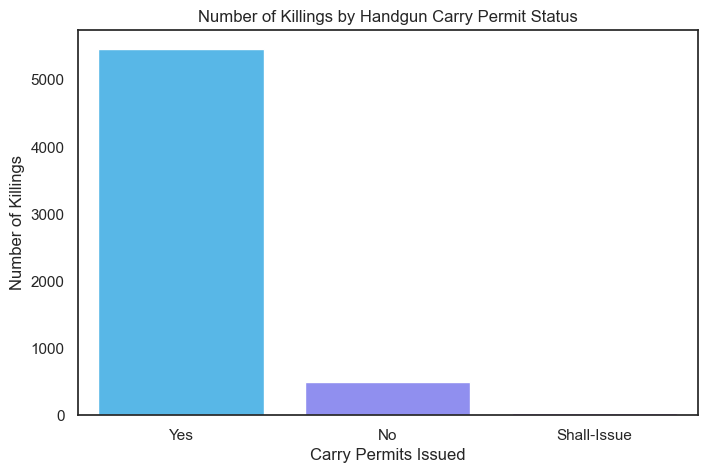

In [61]:
# Подготовка данных
carry_permit_killings = data['Handgun - Carry permits issued'].value_counts()

# Визуализация
plt.figure(figsize=(8, 5))
sns.barplot(x=carry_permit_killings.index, y=carry_permit_killings.values, palette='cool')
plt.title('Number of Killings by Handgun Carry Permit Status')
plt.xlabel('Carry Permits Issued')
plt.ylabel('Number of Killings')
plt.show()

Результаты показывают, что большинство убийств происходит в штатах, где выдаются разрешения на ношение оружия ("Yes").